In [1]:
# Main Code for Data 

import pandas as pd
import os
import csv
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as st

# File to Load (Remember to Change These)
# Name of the CSV files
sales_data = 'sales.csv'
gas_data='gas_prices.csv'
unemployment_data='unemployment.csv'

sales_df = pd.read_csv(sales_data)
gas_df=pd.read_csv(gas_data)
unemployment_df=pd.read_csv(unemployment_data)

In [2]:
sales_df.head()

,Month,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
0,2005,"1,052,224","1,244,753","1,564,938","1,493,837","1,488,171","1,671,401","1,795,944","1,474,130","1,321,156","1,139,217","1,160,447","1,475,649"
1,2006,"1,136,538","1,253,271","1,519,952","1,439,311","1,478,735","1,487,688","1,480,504","1,478,072","1,342,543","1,205,973","1,188,344","1,419,758"
2,2007,"1,079,891","1,244,375","1,528,582","1,326,837","1,550,609","1,433,282","1,302,661","1,467,601","1,305,275","1,221,485","1,170,035","1,377,542"
3,2008,"1,036,540","1,162,277","1,339,158","1,237,336","1,383,754","1,176,765","1,126,477","1,240,785","959,127","829,396","737,978","884,306"
4,2009,"650,608","681,676","847,002","822,746","919,295","850,654","991,950","1,254,982","740,394","832,953","741,826","1,013,629"


In [3]:
sales_df.dropna(how='all')
sales_df.head()

,Month,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
0,2005,"1,052,224","1,244,753","1,564,938","1,493,837","1,488,171","1,671,401","1,795,944","1,474,130","1,321,156","1,139,217","1,160,447","1,475,649"
1,2006,"1,136,538","1,253,271","1,519,952","1,439,311","1,478,735","1,487,688","1,480,504","1,478,072","1,342,543","1,205,973","1,188,344","1,419,758"
2,2007,"1,079,891","1,244,375","1,528,582","1,326,837","1,550,609","1,433,282","1,302,661","1,467,601","1,305,275","1,221,485","1,170,035","1,377,542"
3,2008,"1,036,540","1,162,277","1,339,158","1,237,336","1,383,754","1,176,765","1,126,477","1,240,785","959,127","829,396","737,978","884,306"
4,2009,"650,608","681,676","847,002","822,746","919,295","850,654","991,950","1,254,982","740,394","832,953","741,826","1,013,629"


In [4]:
sales_df.dtypes

Month     int64
Jan      object
Feb      object
Mar      object
Apr      object
May      object
Jun      object
Jul      object
Aug      object
Sep      object
Oct      object
Nov      object
Dec      object
dtype: object

In [5]:
months = sales_df.columns
months

Index(['Month', 'Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep',
       'Oct', 'Nov', 'Dec'],
      dtype='object')

In [6]:
mon_year = []
sales = []
for _, row in sales_df.iterrows():
    cur_year = row[0]
    for idx, cur_value in enumerate(list(row)):
        # we only care about columns after the first column
        if idx > 0:
            cur_month = months[idx]
            cur_key = f"{cur_month}-{cur_year}"
            mon_year.append(cur_key)
            sales.append(cur_value)
#             break
sales_df_data = {
    "MonthYear": mon_year,
    "Sales (Units Sold)": sales
}
final_sales_df=pd.DataFrame(sales_df_data)
final_sales_df.head(50)

,MonthYear,Sales (Units Sold)
0,Jan-2005,"1,052,224"
1,Feb-2005,"1,244,753"
2,Mar-2005,"1,564,938"
3,Apr-2005,"1,493,837"
4,May-2005,"1,488,171"
5,Jun-2005,"1,671,401"
6,Jul-2005,"1,795,944"
7,Aug-2005,"1,474,130"
8,Sep-2005,"1,321,156"
9,Oct-2005,"1,139,217"


In [7]:
final_sales_df.dtypes

MonthYear             object
Sales (Units Sold)    object
dtype: object

In [8]:
merge_df=pd.merge(final_sales_df, gas_df, on="MonthYear")
merge_df

,MonthYear,Sales (Units Sold),Price Per Gallon
0,Jan-2005,"1,052,224",1.831
1,Feb-2005,"1,244,753",1.910
2,Mar-2005,"1,564,938",2.079
3,Apr-2005,"1,493,837",2.243
4,May-2005,"1,488,171",2.161
...,...,...,...
194,Mar-2021,"1,536,038",2.810
195,Apr-2021,"1,493,938",2.858
196,May-2021,"1,502,642",2.985
197,Jun-2021,"1,352,285",3.064


In [9]:
merge_df.dtypes

MonthYear              object
Sales (Units Sold)     object
Price Per Gallon      float64
dtype: object

In [10]:
final_df=pd.merge(merge_df,unemployment_df, on="MonthYear")
final_df

,MonthYear,Sales (Units Sold),Price Per Gallon,Unemployment_Rate
0,Jan-2005,"1,052,224",1.831,5.3
1,Feb-2005,"1,244,753",1.910,5.4
2,Mar-2005,"1,564,938",2.079,5.2
3,Apr-2005,"1,493,837",2.243,5.2
4,May-2005,"1,488,171",2.161,5.1
...,...,...,...,...
194,Mar-2021,"1,536,038",2.810,6.0
195,Apr-2021,"1,493,938",2.858,6.1
196,May-2021,"1,502,642",2.985,5.8
197,Jun-2021,"1,352,285",3.064,5.9


In [11]:
final_df.count()

MonthYear             199
Sales (Units Sold)    199
Price Per Gallon      199
Unemployment_Rate     199
dtype: int64

In [12]:
final_df.describe()

,Price Per Gallon,Unemployment_Rate
count,199.000000,199.000000
mean,2.782452,6.222111
std,0.563422,2.133597
min,1.687000,3.500000
25%,2.306500,4.600000
50%,2.717000,5.400000
75%,3.227000,7.850000
max,4.062000,14.800000


In [13]:
final_df

,MonthYear,Sales (Units Sold),Price Per Gallon,Unemployment_Rate
0,Jan-2005,"1,052,224",1.831,5.3
1,Feb-2005,"1,244,753",1.910,5.4
2,Mar-2005,"1,564,938",2.079,5.2
3,Apr-2005,"1,493,837",2.243,5.2
4,May-2005,"1,488,171",2.161,5.1
...,...,...,...,...
194,Mar-2021,"1,536,038",2.810,6.0
195,Apr-2021,"1,493,938",2.858,6.1
196,May-2021,"1,502,642",2.985,5.8
197,Jun-2021,"1,352,285",3.064,5.9


In [14]:
final_df.rename(columns = {'Sales (Units Sold)':'Sales'}, inplace = True)

In [15]:
final_df

,MonthYear,Sales,Price Per Gallon,Unemployment_Rate
0,Jan-2005,"1,052,224",1.831,5.3
1,Feb-2005,"1,244,753",1.910,5.4
2,Mar-2005,"1,564,938",2.079,5.2
3,Apr-2005,"1,493,837",2.243,5.2
4,May-2005,"1,488,171",2.161,5.1
...,...,...,...,...
194,Mar-2021,"1,536,038",2.810,6.0
195,Apr-2021,"1,493,938",2.858,6.1
196,May-2021,"1,502,642",2.985,5.8
197,Jun-2021,"1,352,285",3.064,5.9


In [16]:
final_df.dtypes

MonthYear             object
Sales                 object
Price Per Gallon     float64
Unemployment_Rate    float64
dtype: object

In [17]:
final_df['Sales'] = final_df['Sales'].str.replace(r'\D', '')
final_df

,MonthYear,Sales,Price Per Gallon,Unemployment_Rate
0,Jan-2005,1052224,1.831,5.3
1,Feb-2005,1244753,1.910,5.4
2,Mar-2005,1564938,2.079,5.2
3,Apr-2005,1493837,2.243,5.2
4,May-2005,1488171,2.161,5.1
...,...,...,...,...
194,Mar-2021,1536038,2.810,6.0
195,Apr-2021,1493938,2.858,6.1
196,May-2021,1502642,2.985,5.8
197,Jun-2021,1352285,3.064,5.9


In [18]:
final_df[['Sales']] = final_df[['Sales']].astype(float)

In [19]:
final_df.dtypes

MonthYear             object
Sales                float64
Price Per Gallon     float64
Unemployment_Rate    float64
dtype: object

In [20]:
final_df.head()

,MonthYear,Sales,Price Per Gallon,Unemployment_Rate
0,Jan-2005,1052224.0,1.831,5.3
1,Feb-2005,1244753.0,1.910,5.4
2,Mar-2005,1564938.0,2.079,5.2
3,Apr-2005,1493837.0,2.243,5.2
4,May-2005,1488171.0,2.161,5.1


In [21]:
#Calculation of averages for gas price averages, auto sales averages, and unemployment

mean_gas = final_df.groupby('MonthYear').mean()['Price Per Gallon']
mean_sales = final_df.groupby('MonthYear').mean()['Sales']
mean_ue = final_df.groupby('MonthYear').mean()['Unemployment_Rate']
summary_mean = pd.DataFrame({"Average Gas Price":mean_gas,
                              "Average Sales Price":mean_sales,
                              "Average Unempoloyment Rate":mean_ue})
summary_mean

,Average Gas Price,Average Sales Price,Average Unempoloyment Rate
MonthYear,,,
Apr-2005,2.243,1493837.0,5.2
Apr-2006,2.742,1439311.0,4.7
Apr-2007,2.845,1326837.0,4.5
Apr-2008,3.458,1237336.0,5.0
Apr-2009,2.049,822746.0,9.0
...,...,...,...
Sep-2016,2.219,1428354.0,5.0
Sep-2017,2.645,1523050.0,4.2
Sep-2018,2.836,1440820.0,3.7


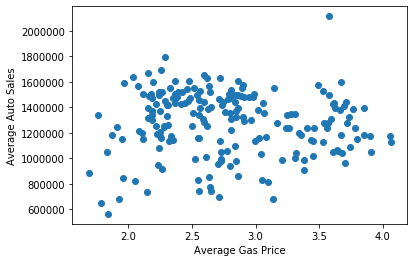

In [22]:
# Generate a scatter plot of average gas price vs. auto sales

plt.scatter(mean_gas,mean_sales)
plt.xlabel("Average Gas Price")
plt.ylabel("Average Auto Sales")


plt.show()

In [23]:
print(f"The correlation coefficient between gas price and auto sales is {round(st.pearsonr(mean_gas,mean_sales)[0],2)}")

The correlation coefficient between gas price and auto sales is -0.03


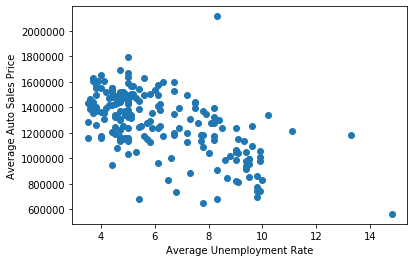

In [24]:
# Generate a scatter plot of average unemployment rate vs. auto sales


plt.scatter(mean_ue,mean_sales)
plt.xlabel("Average Unemployment Rate")
plt.ylabel("Average Auto Sales Price")


plt.show()

In [25]:
print(f"The correlation coefficient between unemployment rate and auto sales is {round(st.pearsonr(mean_ue,mean_sales)[0],2)}")

The correlation coefficient between unemployment rate and auto sales is -0.6
